<a href="https://colab.research.google.com/github/MateenMalik22/bbc-news-web-scraping/blob/main/bbc_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests beautifulsoup4 pandas lxml
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
# Get the webpage content
url = "https://www.bbc.com/news/world"
response = requests.get(url)

In [ ]:
# Check if request was successful
print(response)

<Response [200]>


In [ ]:
# Parse with BeautifulSoup
soup = BeautifulSoup(response.content, 'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-GB">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width" name="viewport"/>
  <title>
   World | Latest News &amp; Updates | BBC News
  </title>
  <meta content="World | Latest News &amp; Updates | BBC News" property="og:title"/>
  <meta content="World | Latest News &amp; Updates | BBC News" name="twitter:title"/>
  <meta content="Get all the latest news, live updates and content about the World from across the BBC." name="description"/>
  <meta content="Get all the latest news, live updates and content about the World from across the BBC." property="og:description"/>
  <meta content="Get all the latest news, live updates and content about the World from across the BBC." name="twitter:description"/>
  <meta content="#da532c" name="msapplication-TileColor"/>
  <meta content="#ffffff" name="theme-color"/>
  <meta content="NOODP, NOYDIR" name="robots"/>
  <link href="/bbcx/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
  <li

In [ ]:
# Extract the relevant data
articles = soup.find_all('div', {'data-testid': ['edinburgh-card', 'dundee-card', 'manchester-card', 'london-card', 'virginia-section-7']})

data = []

for article in articles:
    # Extract the headline
    headline_tag = article.find('h2', {'data-testid': 'card-headline'})
    headline_text = headline_tag.get_text(strip=True) if headline_tag else None

    # Extract the category/tag
    category_tag = article.find('span', {'data-testid': 'card-metadata-tag'})
    category_text = category_tag.get_text(strip=True) if category_tag else None

    # Extract the timestamp
    timestamp_tag = article.find('span', {'data-testid': 'card-metadata-lastupdated'})
    timestamp_text = timestamp_tag.get_text(strip=True) if timestamp_tag else None

    # Author information is not available in the provided snippet, so we'll leave it as None
    author_text = None

    # Append the extracted data
    data.append({
        'Headline': headline_text,
        'Category': category_text,
        'Author': author_text,
        'Timestamp': timestamp_text
    })


df = pd.DataFrame(data)



In [ ]:
df

,Headline,Category,Author,Timestamp
0,Lebanon says 22 killed and 117 wounded in fres...,Europe,None,5 hrs ago
1,Lebanon says 22 killed and 117 wounded in fres...,None,None,None
2,At least six dead after Hurricane Milton thras...,None,None,None
3,Portugal tries to tempt under-35s with tax cuts,Europe,None,5 hrs ago
4,UN accuses Israel of war crimes over attacks o...,Middle East,None,1 hr ago
5,Tennis legend Nadal to retire in November,Tennis,None,4 hrs ago
6,At least six dead after Hurricane Milton thras...,None,None,None
7,Moment police evacuate family after tree strik...,US & Canada,None,4 hrs ago
8,Accused men confronted with abuse videos in Fr...,Europe,None,3 hrs ago
9,Portugal tries to tempt under-35s with tax cuts,Europe,None,5 hrs ago


In [ ]:
# Drop the 'Author' column
df.drop(columns=['Author'], inplace=True)

In [ ]:
df

,Headline,Category,Timestamp
0,Lebanon says 22 killed and 117 wounded in fres...,Europe,5 hrs ago
1,Lebanon says 22 killed and 117 wounded in fres...,None,None
2,At least six dead after Hurricane Milton thras...,None,None
3,Portugal tries to tempt under-35s with tax cuts,Europe,5 hrs ago
4,UN accuses Israel of war crimes over attacks o...,Middle East,1 hr ago
5,Tennis legend Nadal to retire in November,Tennis,4 hrs ago
6,At least six dead after Hurricane Milton thras...,None,None
7,Moment police evacuate family after tree strik...,US & Canada,4 hrs ago
8,Accused men confronted with abuse videos in Fr...,Europe,3 hrs ago
9,Portugal tries to tempt under-35s with tax cuts,Europe,5 hrs ago


In [ ]:
# Conversion of Timestamp to Date-Time format
from datetime import datetime, timedelta

def convert_to_datetime(timestamp):
    if pd.isna(timestamp) or "Just" in timestamp:
        return datetime.now().strftime('%d/%m/%Y %H:%M:%S')
    value, unit = timestamp.split()[:2]
    delta = timedelta(minutes=int(value)) if 'min' in unit else timedelta(hours=int(value))
    return (datetime.now() - delta).strftime('%d/%m/%Y %H:%M:%S')

# Apply conversion and drop NaNs
df['Timestamp'] = df['Timestamp'].apply(convert_to_datetime)

In [ ]:
df

,Headline,Category,Timestamp
0,Lebanon says 22 killed and 117 wounded in fres...,Europe,10/10/2024 14:53:57
1,Lebanon says 22 killed and 117 wounded in fres...,None,10/10/2024 19:53:57
2,At least six dead after Hurricane Milton thras...,None,10/10/2024 19:53:57
3,Portugal tries to tempt under-35s with tax cuts,Europe,10/10/2024 14:53:57
4,UN accuses Israel of war crimes over attacks o...,Middle East,10/10/2024 18:53:57
5,Tennis legend Nadal to retire in November,Tennis,10/10/2024 15:53:57
6,At least six dead after Hurricane Milton thras...,None,10/10/2024 19:53:57
7,Moment police evacuate family after tree strik...,US & Canada,10/10/2024 15:53:57
8,Accused men confronted with abuse videos in Fr...,Europe,10/10/2024 16:53:57
9,Portugal tries to tempt under-35s with tax cuts,Europe,10/10/2024 14:53:57


In [ ]:
# Drop rows where either 'Category' or 'Timestamp' is NaN or empty
df = df.dropna(subset=['Category', 'Timestamp']).reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Headline   22 non-null     object
 1   Category   22 non-null     object
 2   Timestamp  22 non-null     object
dtypes: object(3)
memory usage: 656.0+ bytes


In [ ]:
df

,Headline,Category,Timestamp
0,Lebanon says 22 killed and 117 wounded in fres...,Europe,10/10/2024 14:53:57
1,Portugal tries to tempt under-35s with tax cuts,Europe,10/10/2024 14:53:57
2,UN accuses Israel of war crimes over attacks o...,Middle East,10/10/2024 18:53:57
3,Tennis legend Nadal to retire in November,Tennis,10/10/2024 15:53:57
4,Moment police evacuate family after tree strik...,US & Canada,10/10/2024 15:53:57
5,Accused men confronted with abuse videos in Fr...,Europe,10/10/2024 16:53:57
6,Portugal tries to tempt under-35s with tax cuts,Europe,10/10/2024 14:53:57
7,"Eritrea, Egypt and Somalia cement 'axis agains...",World,10/10/2024 17:53:57
8,Russian strike kills eight in fresh attack on ...,Europe,10/10/2024 11:53:57
9,Human rights advocate Ethel Kennedy dies at 96,US & Canada,10/10/2024 17:53:57


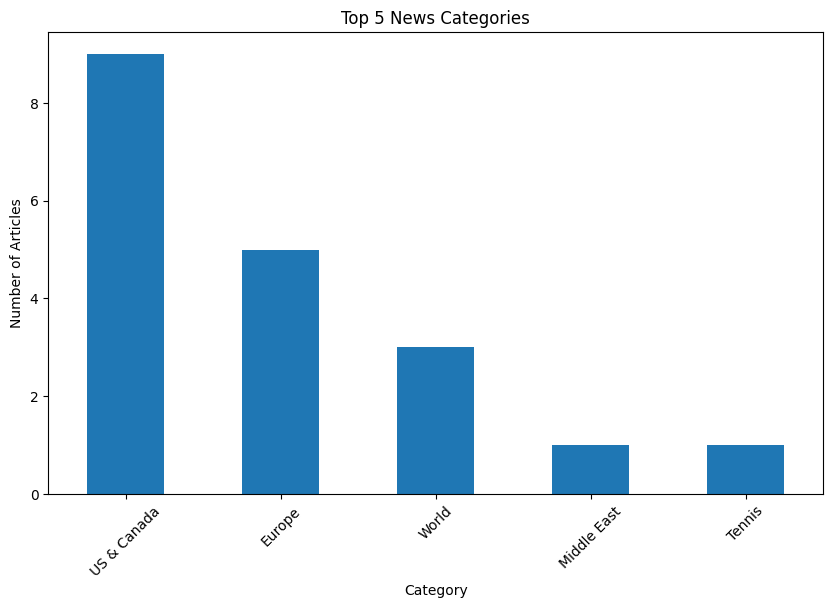

In [ ]:
import matplotlib.pyplot as plt
# Plotting the top 5 most frequent news categories
top_categories = df['Category'].value_counts().head(5)

plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar')
plt.title('Top 5 News Categories')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Save data to CSV
df.to_csv('bbc_news_world.csv', index=False)
print("Data saved to bbc_news_world.csv")

Data saved to bbc_news_world.csv
